# Data Analysis

## Import

In [1]:
import pandas as pd # For handling and analyzing tabular data

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

import re # For validating and manipulating text
import numpy as np # For numeric calculation

## Read cleaned data from CSV file

In [2]:
anime_data = pd.read_csv('./data/anime_data_cleaned.csv')

# Check dataset
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,2471,Doraemon (1979),Doraemon,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,39342,66089,Shin-Ei Animation,pg
1,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
2,966,Crayon Shin-chan,Shin Chan,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,41800,87019,Shin-Ei Animation,g
3,170,Slam Dunk,Slam Dunk,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,141218,312658,Toei Animation,pg_13
4,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,56228,Rekishi ni Nokoru Akujo ni Naru zo,I'll Become a Villainess Who Goes Down in History,tv,currently_airing,Fall 2024,"Comedy, Fantasy, Isekai, Romance, Shoujo, Vill...",7.06,8835,61849,Maho Film,pg_13
2146,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
2147,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
2148,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


## Question 01: Which anime genres have been the most or least popular among viewers over the years?

### Brief explanation
- Identify the most popular anime genres among viewers by analyzing their preferences over the years (starting from 1995).
- We only focus on our included genres (e.g., action, drama, comedy, etc.).

### Benefits of finding answer
- **Understand audience preferences**: Helps producers and marketers tailor their future projects to align with popular genres.
- **Improve recommendations**: Some anime streaming platforms can use this data to suggest anime based on trending genres, which **will be very helpful for beginners watching anime to choose hot-trend genres that are suitable for them**.
- **Market insights**: Useful for identifying trends in the anime industry and predicting future shifts in viewer preferences.

### Find the answer by using data
- We will use the ```Genres``` column along with the mean (average) of ```Number of Members``` metric to measure genre popularity.
- We only focus on our included genres.
- Visualize the answer and draw conclusions.

In [3]:
# Included genres list
included_genres = [
    'action', 'adventure', 'comedy', 'drama', 'fantasy',
    'mystery', 'romance', 'sci-fi', 'slice of life', 'sports'
]

In [4]:
# Expand the Genres column and focus on included genres
genre_popularity = (
    anime_data[['Genres', 'Number of Members']]
    .assign(Genres=anime_data['Genres'].str.split(', '))
    .explode('Genres')  # Split and expand genres into separate rows
    .query('Genres.str.lower() in @included_genres', engine='python')  # Filter included genres
    .groupby('Genres')['Number of Members']  # Group by genres
    .mean()  # Aggregate by the mean of Number of Members -> Popularity
    .sort_values(ascending=False)  # Sort by popularity
)

# Reset index to prepare for visualization
genre_popularity = (
    genre_popularity
    .rename_axis('Genre')
    .reset_index()
    .round({'Number of Members': 0}) # Round to 0 decimal places
)

genre_popularity

,Genre,Number of Members
0,Action,354086.0
1,Fantasy,325714.0
2,Drama,317777.0
3,Romance,304284.0
4,Mystery,287439.0
5,Adventure,282919.0
6,Comedy,241836.0
7,Sci-Fi,215773.0
8,Sports,196190.0
9,Slice of Life,165812.0


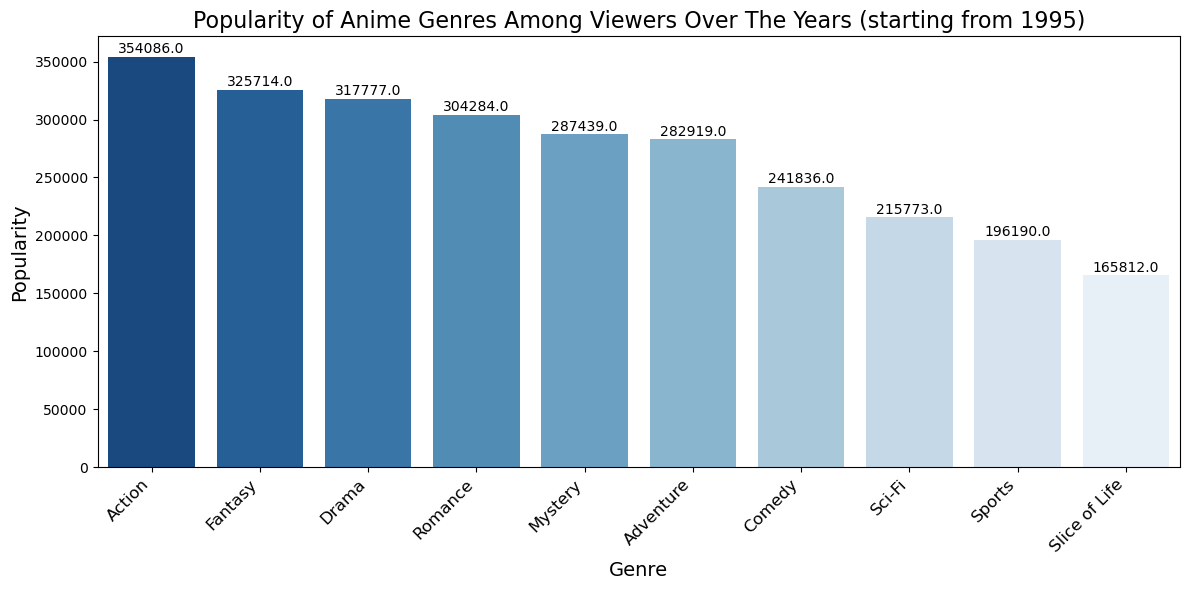

In [5]:
# Visualize (vertical bar chart)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='Genre',
    y='Number of Members',
    data=genre_popularity,
    palette='Blues_r',
    hue='Genre',
    legend=False
)

# Add specific values on top of each bar
for index, row in genre_popularity.iterrows():
    bar_plot.text(
        x=index,
        y=row['Number of Members'] + 3000,  # Position above the bar
        s=f"{row['Number of Members']}",
        ha='center',
        fontsize=10,
        color='black'
    )
    
plt.title("Popularity of Anime Genres Among Viewers Over The Years (starting from 1995)", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

### Conclusions

- The most popular genre over the years is **Action** (~354086).
- The least popular genre over the years is **Slice of Life** (~165811).

## Question 02: Which anime genres have received the most or least positive reviews from viewers over the years?

### Brief explanation
- Determine which genres tend to elicit the most extreme reactions from viewers over the years (starting from 1995) by analyzing ```User Score``` column.
- We only focus on our included genres (e.g., action, drama, comedy, etc.).

### Benefits of finding answer
- **Identify strengths and weaknesses**: Understanding which genres perform well or poorly helps producers and platforms refine their offerings.
- **Improve recommendations**: Platforms can prioritize promoting highly-rated genres to attract and retain viewers, which **will be very helpful for beginners watching anime to choose good genres that are suitable for them**.
- **Measure genre appeal**: Helps determine viewer preferences and guide future investments in anime production for specific genres.

### Find the answer by using data
- We will use the ```Genres``` column along with the mean (average) of ```User Score``` metric to measure genre popularity.
- We only focus on our included genres.
- Visualize the answer and draw conclusions.

In [6]:
# Expand the Genres column and focus on included genres
genre_scores = (
    anime_data[['Genres', 'User Score']]
    .assign(Genres=anime_data['Genres'].str.split(', '))
    .explode('Genres')  # Split and expand genres into separate rows
    .query('Genres.str.lower() in @included_genres', engine='python')  # Filter included genres
    .groupby('Genres')['User Score']  # Group by genres
    .mean()  # Aggregate by the mean of User Score
    .sort_values(ascending=False)  # Sort by User Score
)

# Reset index to prepare for visualization
genre_scores = (
    genre_scores
    .rename_axis('Genre')
    .reset_index()
    .rename(columns={'User Score': 'Average User Score'})  # Rename 'User Score' column
    .round({'Average User Score': 2})  # Round to 2 decimal places
)

genre_scores

,Genre,Average User Score
0,Sports,7.70
1,Mystery,7.69
2,Slice of Life,7.69
3,Drama,7.66
4,Action,7.55
5,Adventure,7.50
6,Romance,7.49
7,Fantasy,7.47
8,Comedy,7.47
9,Sci-Fi,7.46


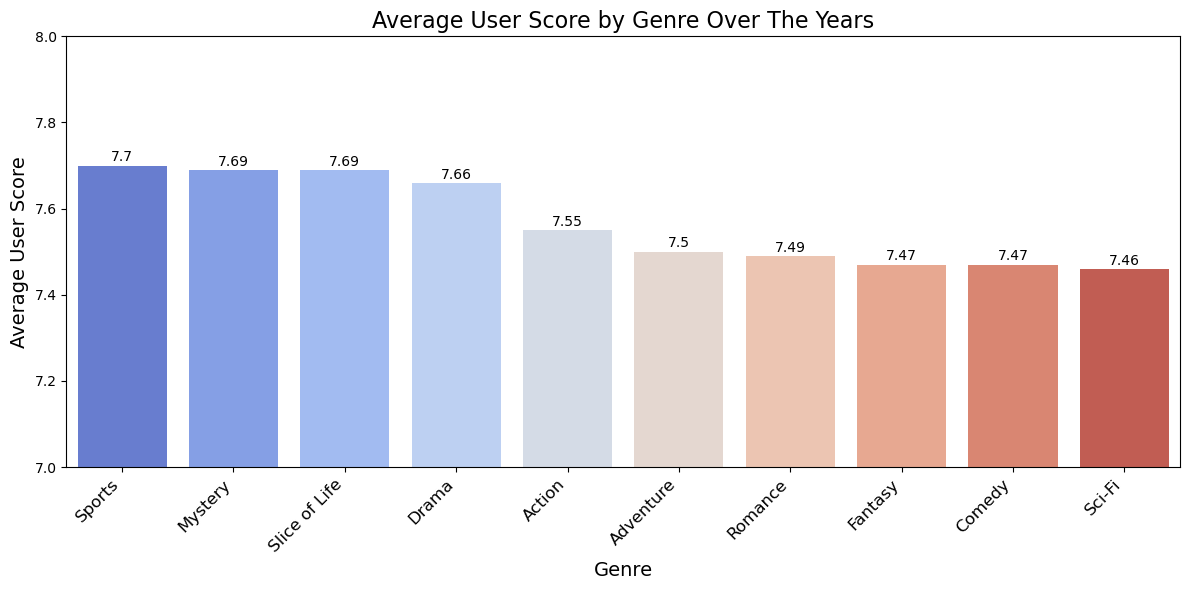

In [7]:
# Visualize (vertical bar chart)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='Genre',
    y='Average User Score',
    data=genre_scores,
    palette='coolwarm',
    hue='Genre',
    legend=False
)

# Adjust Y-axis range to emphasize differences
plt.ylim(7, 8)  # Focus on the range of values

# Add specific values on top of each bar
for index, row in genre_scores.iterrows():
    bar_plot.text(
        x=index,
        y=row['Average User Score'] + 0.01,  # Position above the bar
        s=f"{row['Average User Score']}",
        ha='center',
        fontsize=10,
        color='black'
    )

plt.title("Average User Score by Genre Over The Years", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Average User Score", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

### Conclusions

- Viewer ratings for anime genres over the years have consistently been **quite good** (~7.5).
- The highest-rated anime genre by viewers over the years is **Sports** (~7.7).
- The lowest-rated anime genre by viewers over the years is **Sci-Fi** (~7.46).

## Question 03: How has the average User Score for each Media Type changed over the years?
### Brief explanation
- Find out the trend of changing average rating (```User Score```) of each anime type (```Media Type```) - tv and movie over the years (starting from 1995).
### Benefits of finding answer
- **Understand how viewer preference** for each type has changed.
- **Help** producers identify which formats are gaining or losing popularity over the years.
### Find the answer by using data
- Use the ```Media Type```, ```User Score```, and ```Premiered Season``` column.
- Convert the ```Premiered Season``` column to new column ```Year``` (numeric) for analyzing.
- Calculate the average ```User Score``` for each ```Media Type``` and each year.
- Use a line plot to illustrate the change in the average score for each format over the years.

In [8]:
# Preprocessing
# Extract year from 'Premiered Season' and insert new column to dataset
anime_data['Year'] = anime_data['Premiered Season'].str.extract(r'(\d{4})').astype(int)
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating,Year
0,2471,Doraemon (1979),Doraemon,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,39342,66089,Shin-Ei Animation,pg,1979
1,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13,1989
2,966,Crayon Shin-chan,Shin Chan,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,41800,87019,Shin-Ei Animation,g,1992
3,170,Slam Dunk,Slam Dunk,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,141218,312658,Toei Animation,pg_13,1993
4,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,56228,Rekishi ni Nokoru Akujo ni Naru zo,I'll Become a Villainess Who Goes Down in History,tv,currently_airing,Fall 2024,"Comedy, Fantasy, Isekai, Romance, Shoujo, Vill...",7.06,8835,61849,Maho Film,pg_13,2024
2146,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13,2024
2147,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13,2024
2148,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13,2024


In [9]:
# Group by Media Type and Year, then calculate average User Score
media_type_scores = (
    anime_data[['Media Type', 'Year', 'User Score']]
    .groupby(['Media Type', 'Year'])['User Score']
    .mean() # Aggregate by the mean of User Score
    .reset_index()
    .round({'User Score': 2}) # Round to 2 decimal places
)
media_type_scores

,Media Type,Year,User Score
0,movie,1995,7.62
1,movie,1996,7.12
2,movie,1997,7.64
3,movie,1998,7.26
4,movie,1999,7.11
...,...,...,...
60,tv,2020,7.61
61,tv,2021,8.00
62,tv,2022,7.93
63,tv,2023,7.68


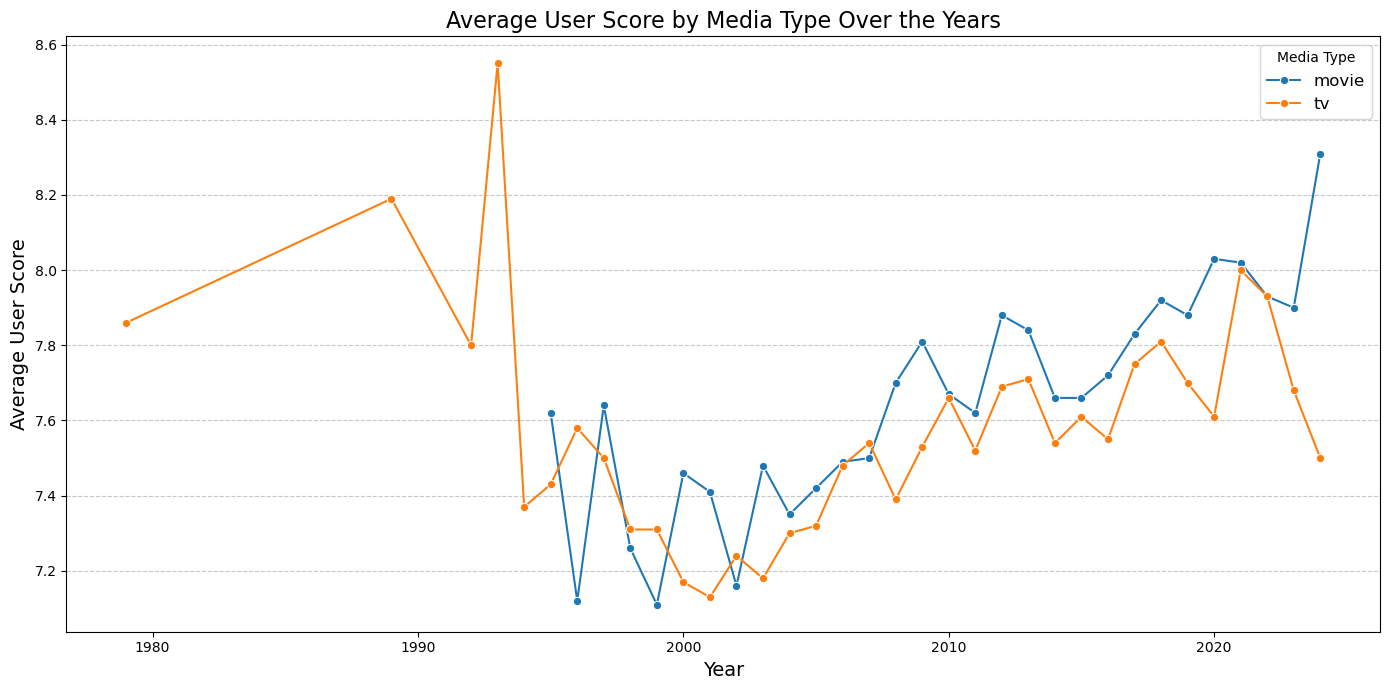

In [10]:
# Visualize by using line plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    x='Year',
    y='User Score',
    hue='Media Type',
    data=media_type_scores,
    marker='o',
    palette='tab10'
)

plt.title('Average User Score by Media Type Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average User Score', fontsize=14)
plt.legend(title='Media Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Conclusions
**Pre-2000 Period**:
- In the pre-2000 period, the TV genre often had higher scores than the movie genre, especially in the late 1980s to early 1990s.
- At this time, the movie genre had not appeared.

**Modern period (after 2000s)**:
- The movie genre had a clear growth in popularity, with the average score increasing steadily over time.
- The TV genre tended to decrease slightly and did not maintain stability in audience ratings, as shown by the strong fluctuations in the graph line.

$\rightarrow$ Movie genres are currently the trend that users accept in the present era, studios can consider this data to boost the production of movie genres to meet user demand trends.

## Question 04: Which studios have produced the most highly-rated anime?
### Brief explanation
- Find out which studios have the best track record in producing highly rated anime, and analyze the quality distribution of anime produced by each genre by that studio.

### Benefits of finding answer
- **Help** identify the top studios in the anime industry.
- **Users can** use this information to choose good quality anime based on the information mined for the best viewing experience.

### Find the answer by using data
- Use the ```Studios``` and ```User Score``` columns.
- Handle partnering studios (if there are multiple studios in a row).
- Find the mean of the ```User Score``` for each studio.
- Use a bar plot to compare the average scores of studios.

In [11]:
# Expand Studios column to handle multiple studios per anime
studio_scores = (
    anime_data[['Studios', 'User Score']]
    .assign(Studios=anime_data['Studios'].str.split(', '))
    .explode('Studios')  # Expand multiple studios into separate rows
    .groupby('Studios')['User Score']
    .mean() # Aggregate by the mean of User Score
    .sort_values(ascending=False)  # Sort by User Score
    .reset_index()
    .round({'User Score': 2}) # Round to 2 decimal places
)
studio_scores

,Studios,User Score
0,Pierrot Films,8.99
1,TOHO animation STUDIO,8.88
2,Studio DURIAN,8.78
3,DandeLion Animation Studio,8.74
4,P.I.C.S.,8.65
...,...,...
241,Hayabusa Film,6.26
242,Studio Elle,6.10
243,Planet,5.98
244,Akatsuki,5.95


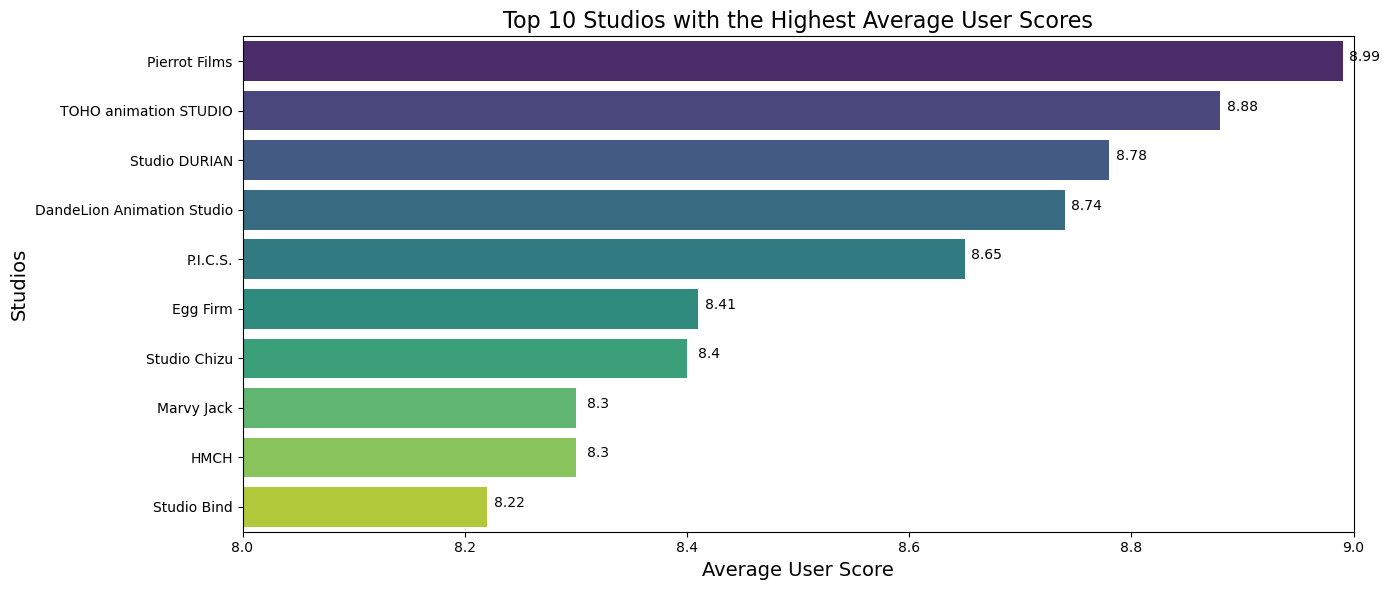

In [12]:
# Visualize by using horizontal bar chart
# Top 10 studios
top_studios = studio_scores.head(10)

plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(
    x='User Score',
    y='Studios',
    data=top_studios,
    palette='viridis',
    hue='Studios',
    legend=False 
)

# Adjust X-axis range to emphasize differences
plt.xlim(8, 9)  # Focus on the range of values

# Add specific values on the right of each bar
for index, row in top_studios.iterrows():
    bar_plot.text(
        y=index,
        x=row['User Score'] + 0.02,  # Position on the right of the bar
        s=f"{row['User Score']}",
        ha='center',
        fontsize=10,
        color='black'
    )

plt.legend([], [], frameon=False)
plt.title('Top 10 Studios with the Highest Average User Scores', fontsize=16)
plt.xlabel('Average User Score', fontsize=14)
plt.ylabel('Studios', fontsize=14)
plt.tight_layout()

plt.show()

### Conclusions
- It can be seen that the studios shown above are the studios that own the most anime series that are viewed and rated by users.
- The highest-rated studio by viewers is **Pierrot Films** (~8.99).

$\rightarrow$ **Viewers can** prioritize choosing anime series from the above studios to bring the best viewing experience.

## Question 05: Do currently airing or finished airing anime attract more members?

### Brief explanation
- Analyze the ```Number of Members``` for each ```Status``` to see if currently airing anime tend to attract more viewers than finished airing anime.

### Benefits of finding answer
- **Understand** the difference in the number of users interested in the two states.
- Draw conclusions about **viewership trends**.

### Find the answer by using data
- Use the ```Status``` and ```Number of Members``` columns.
- Group the data by the ```Status``` column.
- Calculate the mean ```Number of Members``` for each status.
- Sort the results to identify which status attracts the most members on average.
- Visualize the results by using a bar plot.

In [13]:
# Group by 'Status' and calculate the mean Number of Members
status_members = (
    anime_data[['Status', 'Number of Members']]
    .groupby('Status')['Number of Members']
    .mean() # Aggregate by the mean of Number of Members
    .sort_values(ascending=False) # Sort by Number of Members
    .reset_index()
    .round({'Number of Members': 0}) # Round to 0 decimal places
)
status_members

,Status,Number of Members
0,finished_airing,299226.0
1,currently_airing,175767.0


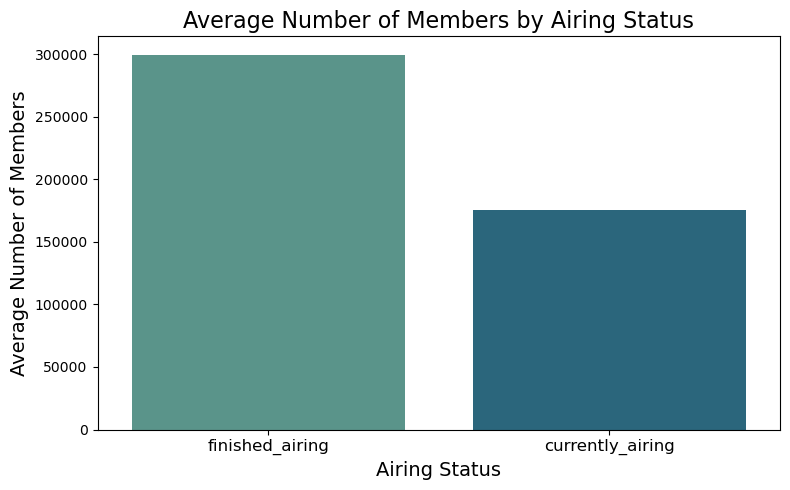

In [14]:
# Rename columns for clarity
status_members.columns = ['Status', 'Average Number of Members']

# Visualize by using vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Status',
    y='Average Number of Members',
    hue='Status',
    data=status_members,
    palette='crest',
    legend=False 
)

# Customize the plot
plt.title('Average Number of Members by Airing Status', fontsize=16)
plt.xlabel('Airing Status', fontsize=14)
plt.ylabel('Average Number of Members', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

### Conclusions
- Fully aired anime tend to attract viewers due to their proven quality and completed storylines.

## Question 06